# Raw Data Visualization
Simple script to inspect the data merge produced in preprocessing step and to visually ensure the quality of the data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import io


In [2]:
df = pd.read_parquet("../data/raw/raw_data.parquet", engine="pyarrow")

In [3]:
def decode_png_image(image_dict):
    # Extract the binary png data
    png_bytes = image_dict.get('bytes')

    # Create a BytesIO object from the binary data
    image_stream = io.BytesIO(png_bytes)

    # Open the image using Pillow
    with Image.open(image_stream) as img:
        img = img.convert('L') 
        # Convert the image to a NumPy array
        image_array = np.array(img)

    return image_array

In [4]:
def visualize_single_image(df, index):
    # Retrieve the image dictionary and label
    image_dict = df.loc[index, 'image']
    label = df.loc[index, 'label']

    # Decode the PNG image
    image_array = decode_png_image(image_dict)

    # Plot the image
    plt.imshow(image_array, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()


By changing the index, you can visualize other images in order to guarantee their integrity

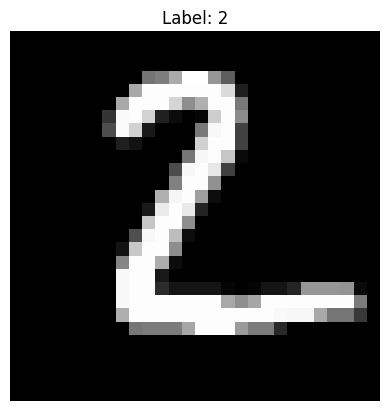

In [5]:
visualize_single_image(df, index=1)
